In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)


In [161]:
df1 = pd.read_csv('df_transform_zeroes_excluded.csv')
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntWine_PerIncome,MntFruit_PerIncome,MntMeat_PerIncome,MntFish_PerIncome,MntSweet_PerIncome,MntGold_PerIncome,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,Education_2n Cycle,Education_Bachelors,Education_HighSchool,Education_Master,Education_PhD,Dt_Custom_Weekday_0,Dt_Custom_Weekday_1,Dt_Custom_Weekday_2,Dt_Custom_Weekday_3,Dt_Custom_Weekday_4,Dt_Custom_Weekday_5,Dt_Custom_Weekday_6,Dt_Customer_Season_Autumn,Dt_Customer_Season_Spring,Dt_Customer_Season_Summer,Dt_Customer_Season_Winter
0,1957,58138.0,0,0,58,6.453625,4.477337,6.302619,5.147494,4.477337,4.477337,3,8,10,4,7,0,0,0,0,0,0,1,-5.210097,-7.186385,-5.361103,-6.516227,-7.186385,-7.186385,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1954,46344.0,1,1,38,2.397895,0.000000,1.791759,0.693147,0.000000,1.791759,2,1,1,2,5,0,0,0,0,0,0,0,-9.039099,-11.436994,-9.645235,-10.743847,-11.436994,-9.645235,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1965,71613.0,0,0,26,6.054439,3.891820,4.844187,4.709530,3.044522,3.737670,1,8,2,10,4,0,0,0,0,0,0,0,-5.817740,-7.980359,-7.027992,-7.162649,-8.827657,-8.134509,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1984,26646.0,1,0,26,2.397895,1.386294,2.995732,2.302585,1.098612,1.609438,2,2,0,4,6,0,0,0,0,0,0,0,-8.485646,-9.497247,-7.887809,-8.580956,-9.784929,-9.274104,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1981,58293.0,1,0,94,5.153292,3.761200,4.770685,3.828641,3.295837,2.708050,5,5,3,6,5,0,0,0,0,0,0,0,-6.513093,-7.905184,-6.895700,-7.837743,-8.370548,-8.958334,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [162]:
df1 = df1.drop(['marital_status_Together','Education_2n Cycle','Dt_Custom_Weekday_0','Dt_Customer_Season_Autumn'], axis=1)

In [163]:
kid_dummies = pd.get_dummies(df1.Kidhome, prefix='Kidhome',drop_first=True)
teen_dummies = pd.get_dummies(df1.Teenhome, prefix='Teenhome',drop_first=True)
df1 = df1.drop(['Kidhome','Teenhome'], axis=1)
df1 = pd.concat([df1,kid_dummies,teen_dummies],axis=1)

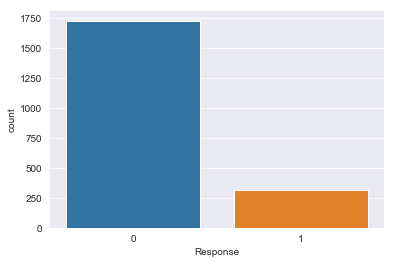

In [164]:
sns.set_style('darkgrid')
sns.countplot(df1.Response)

In [319]:
X = df1.loc[:,df1.columns!='Response']
y = df1.Response

In [296]:
# pn=PolynomialFeatures(degree=2,include_bias=False)
# pn.fit(X)
# columns=pn.get_feature_names(X.columns)
# poly_X=pd.DataFrame(pn.transform(X), columns=columns)
# poly_X.shape

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=15)

In [326]:
scale = MinMaxScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [327]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=15)
X_train,y_train = sm.fit_sample(X_train,y_train)

In [310]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
selector = SelectKBest(f_regression, k=10)
selector.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function f_regression at 0x000002452195EE18>)

In [323]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test= pd.DataFrame(X_test, columns=X.columns)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [328]:
X_train.shape

(2754, 47)

In [280]:
X_test.shape

(410, 20)

In [303]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=15)
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

In [304]:
print(metrics.accuracy_score(y_test,dummy_pred))
print(metrics.f1_score(y_test,dummy_pred))

0.8536585365853658
0.0


In [53]:
X_test.shape

(410, 100)

In [329]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=15)
logreg.fit(X_train,y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [330]:
print(metrics.accuracy_score(y_test,y_pred_test))
print(metrics.f1_score(y_test, y_pred_test))

0.8048780487804879
0.5402298850574713


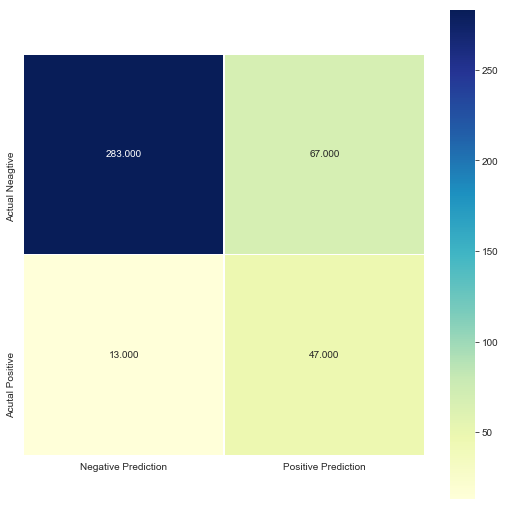

In [331]:
from sklearn.metrics import confusion_matrix
cm_lr_base = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr_base, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu",
            xticklabels=['Negative Prediction','Positive Prediction'], yticklabels=['Actual Neagtive','Acutal Positive'])

In [332]:
from sklearn.model_selection import RandomizedSearchCV
log = LogisticRegression(random_state=15)
penalty=['l1', 'l2']
lambda_terms=[.01,.1,.25,.5,1,2,5,7,10]
params=dict(C=lambda_terms,penalty=penalty)

In [333]:
lr_gs=RandomizedSearchCV(log,params,cv=5,scoring='f1',random_state=15,verbose=10)
log_model = lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] penalty=l1, C=0.25 ..............................................
[CV] ..... penalty=l1, C=0.25, score=0.8164794007490637, total=   0.0s
[CV] penalty=l1, C=0.25 ..............................................
[CV] ..... penalty=l1, C=0.25, score=0.8506151142355008, total=   0.0s
[CV] penalty=l1, C=0.25 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ..... penalty=l1, C=0.25, score=0.8540925266903914, total=   0.0s
[CV] penalty=l1, C=0.25 ..............................................
[CV] ................ penalty=l1, C=0.25, score=0.84375, total=   0.0s
[CV] penalty=l1, C=0.25 ..............................................
[CV] ..... penalty=l1, C=0.25, score=0.8809946714031972, total=   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] ....... penalty=l2, C=10, score=0.8278388278388278, total=   0.0s

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s



[CV] penalty=l2, C=10 ................................................
[CV] ....... penalty=l2, C=10, score=0.8632326820603908, total=   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] ....... penalty=l2, C=10, score=0.8743362831858407, total=   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] ....... penalty=l2, C=10, score=0.8541666666666667, total=   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] ....... penalty=l2, C=10, score=0.8833034111310593, total=   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...... penalty=l2, C=0.1, score=0.8105065666041277, total=   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...... penalty=l2, C=0.1, score=0.8469750889679715, total=   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...... penalty=l2, C=0.1, score=0.8424778761061947, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV] ...... penalty=l1, C=0.1, score=0.8226950354609929, total=   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...... penalty=l1, C=0.1, score=0.8267148014440433, total=   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...... penalty=l1, C=0.1, score=0.8098591549295775, total=   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...... penalty=l1, C=0.1, score=0.8642857142857143, total=   0.0s
[CV] penalty=l2, C=5 .................................................
[CV] ........ penalty=l2, C=5, score=0.8293577981651378, total=   0.0s
[CV] penalty=l2, C=5 .................................................
[CV] ........ penalty=l2, C=5, score=0.8617021276595744, total=   0.0s
[CV] penalty=l2, C=5 .................................................
[CV] ......... penalty=l2, C=5, score=0.875886524822695, total=   0.0s
[CV] penalty=l2, C=5 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.1s finished


In [334]:
print('Best Penalty:',log_model.best_estimator_.get_params()['penalty'])
print('Best C:', log_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7


In [335]:
logreg=LogisticRegression(C=7, penalty='l2',random_state=15)
logreg.fit(X_train,y_train)
y_pred_train_log = logreg.predict(X_train)
y_pred_test_log = logreg.predict(X_test)

In [336]:
print(metrics.accuracy_score(y_train,y_pred_train_log))
print(metrics.f1_score(y_train, y_pred_train_log))
print(metrics.accuracy_score(y_test,y_pred_test_log))
print(metrics.f1_score(y_test, y_pred_test_log))

0.8685548293391431
0.8714488636363636
0.8146341463414634
0.5476190476190477


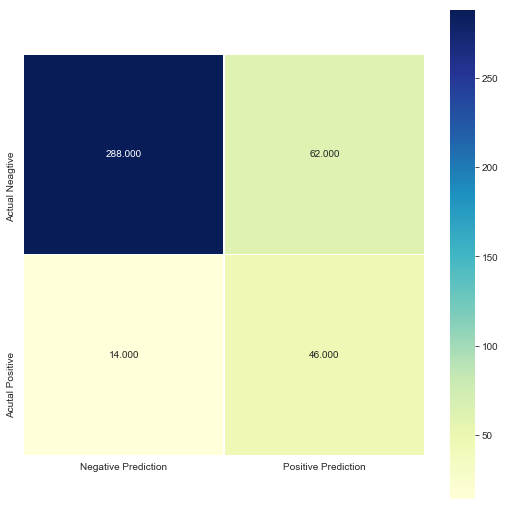

In [337]:
cm_lr = confusion_matrix(y_test, y_pred_test_log)
plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu",
            xticklabels=['Negative Prediction','Positive Prediction'], yticklabels=['Actual Neagtive','Acutal Positive'])

In [338]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=15)
rf.fit(X_train,y_train)
y_pred_train_rfbase = rf.predict(X_train)
y_pred_test_rfbase = rf.predict(X_test)

In [342]:
print(metrics.accuracy_score(y_train,y_pred_train_rfbase))
print(metrics.f1_score(y_train, y_pred_train_rfbase))
print(metrics.accuracy_score(y_test,y_pred_test_rfbase))
print(metrics.f1_score(y_test, y_pred_test_rfbase))

0.9963689179375453
0.9963662790697675
0.8707317073170732
0.5225225225225224


In [343]:
n_estimators=range(100,1100,100)
criterion = ['entropy','gini']
max_features = ['auto','log2']
max_depth = range(5,16)
min_samples_leaf = range(2,15,1)
min_samples_split = range(2,11,2)
n_jobs=-1
params = dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf, criterion=criterion,max_depth=max_depth, min_samples_split=min_samples_split)
rfc = RandomForestClassifier(random_state=15)

In [344]:
rfc_rs = RandomizedSearchCV(estimator=rfc,param_distributions=params,cv=5,scoring='f1',verbose=10, n_jobs=-1)
rfc_model = rfc_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.8s finished


In [345]:
rfc_model.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 15,
 'verbose': 0,
 'warm_start': False}

In [346]:
rf = RandomForestClassifier(max_depth=13,min_samples_leaf=3,n_estimators=1000,
                            criterion='entropy',min_samples_split=4,random_state=15, max_features='log2')
rf.fit(X_train,y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [347]:
print(metrics.accuracy_score(y_train,y_train_pred_rf))
print(metrics.f1_score(y_train, y_train_pred_rf))
print(metrics.accuracy_score(y_test,y_test_pred_rf))
print(metrics.f1_score(y_test, y_test_pred_rf))

0.9923747276688453
0.9923552966872953
0.8707317073170732
0.5546218487394957


In [348]:
print(metrics.precision_score(y_test,y_test_pred_rf))
print(metrics.recall_score(y_test, y_test_pred_rf))

0.559322033898305
0.55


In [349]:
rf.feature_importances_

array([2.15169571e-02, 3.03020921e-02, 8.81005410e-02, 3.09443591e-02,
       2.33143467e-02, 3.47923568e-02, 2.18546806e-02, 2.48928927e-02,
       3.42464212e-02, 2.38932312e-02, 3.58268932e-02, 6.11245229e-02,
       4.03414400e-02, 4.22920098e-02, 4.23530909e-02, 7.04784163e-03,
       4.30687924e-02, 3.49634803e-02, 3.18921568e-03, 2.26391047e-05,
       2.65013280e-02, 2.13008127e-02, 4.21647140e-02, 2.04509067e-02,
       2.09667437e-02, 4.05866016e-02, 7.47233090e-03, 1.73443966e-02,
       2.34859982e-02, 2.06239847e-03, 7.86142950e-03, 9.84580331e-04,
       3.89600109e-03, 1.96572875e-02, 3.90972693e-03, 5.72181134e-03,
       4.16726316e-03, 4.97896260e-03, 3.89950293e-03, 4.34639147e-03,
       1.31505747e-02, 9.45053940e-03, 7.80954191e-03, 9.98075763e-03,
       2.47957502e-04, 3.31021503e-02, 4.11486610e-04])

In [350]:
from sklearn.neighbors import KNeighborsClassifier
knn_base = KNeighborsClassifier()
knn_base.fit(X_train,y_train)
y_pred_train_knn_base = knn_base.predict(X_train)
y_pred_test_knn_base = knn_base.predict(X_test)

In [351]:
print(metrics.accuracy_score(y_train,y_pred_train_knn_base))
print(metrics.f1_score(y_train, y_pred_train_knn_base))
print(metrics.accuracy_score(y_test,y_pred_test_knn_base))
print(metrics.f1_score(y_test, y_pred_test_knn_base))

0.9081336238198984
0.9154129053828151
0.6902439024390243
0.33507853403141363


In [352]:
knn = KNeighborsClassifier()
n_neighbors = range(5,11,1)
weights = ['uniform','distance']
leaf_size = range(60,101,5)
p = range(1,6,1)
params = dict(n_neighbors=n_neighbors,weights=weights,leaf_size=leaf_size,p=p)

In [353]:
knn_rs = RandomizedSearchCV(estimator=knn,param_distributions=params,cv=5,scoring='f1',verbose=10, n_jobs=-1)
knn_model = knn_rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.3s finished


In [354]:
knn_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 95,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'uniform'}

In [355]:
knn_final = KNeighborsClassifier(leaf_size=95,metric='minkowski',n_neighbors=6,p=1,weights='uniform')
knn_final.fit(X_train,y_train)
y_pred_train_knn = knn_final.predict(X_train)
y_pred_test_knn = knn_final.predict(X_test)

In [356]:
print(metrics.accuracy_score(y_train,y_pred_train_knn))
print(metrics.f1_score(y_train, y_pred_train_knn))
print(metrics.accuracy_score(y_test,y_pred_test_knn))
print(metrics.f1_score(y_test, y_pred_test_knn))

0.9484386347131445
0.9501754385964912
0.7878048780487805
0.3458646616541353


In [357]:
from xgboost import XGBClassifier
xgbc_base = XGBClassifier(objective='binary:logistic',random_state=15)
xgbc_base.fit(X_train,y_train)
y_pred_train_xgbc_base = xgbc_base.predict(X_train)
y_pred_test_xgbc_base = xgbc_base.predict(X_test)

In [358]:
print(metrics.accuracy_score(y_train,y_pred_train_xgbc_base))
print(metrics.f1_score(y_train, y_pred_train_xgbc_base))
print(metrics.accuracy_score(y_test,y_pred_test_xgbc_base))
print(metrics.f1_score(y_test, y_pred_test_xgbc_base))

0.9596949891067538
0.959533357637623
0.8512195121951219
0.5196850393700787


In [361]:
xgbc = XGBClassifier(random_state=15)
objective = ['binary:logistic','binary:logitraw','binary:hinge']
max_depth = np.arange(5,15)
learning_rate = [.01,.05,.1,.25,.33,.5]
n_estimators = np.arange(1000,1600,100)
colsample_bytree = [.1,.25,.33,.5]
reg_alpha = [.01,.1,.25,.5,1,2]
reg_lambda = [1,2,5,7,10]
n_thread=np.arange(1,5,1)
subsample = [.2,.4,.6,.8,1]
params = dict(objective=objective,max_depth=max_depth,learning_rate=learning_rate,n_estimators=n_estimators,colsample_bytree=colsample_bytree,
              reg_alpha=reg_alpha,reg_lambda=reg_lambda, n_thread = n_thread, subsample=subsample)

In [362]:
from sklearn.model_selection import GridSearchCV
xgbc_gs = RandomizedSearchCV(estimator=xgbc,param_distributions=params,cv=5,scoring='roc_auc',verbose=10, n_jobs=-1)
xgbc_model = xgbc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.5min finished


In [363]:
xgbc_model.best_params_

{'subsample': 0.4,
 'reg_lambda': 2,
 'reg_alpha': 2,
 'objective': 'binary:logitraw',
 'n_thread': 4,
 'n_estimators': 1200,
 'max_depth': 10,
 'learning_rate': 0.05,
 'colsample_bytree': 0.5}

In [364]:
xgbc_model.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 1200,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logitraw',
 'random_state': 15,
 'reg_alpha': 2,
 'reg_lambda': 2,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.4,
 'verbosity': 1,
 'n_thread': 4}

In [365]:
xgbc = XGBClassifier(objective='binary:logitraw',n_estimators=1200,reg_alpha=2,reg_lambda=2,learning_rate=.05,
                        colsample_bytree=.5,max_depth=10, n_thread=4,susbample=.4,random_state=15)
xgbc.fit(X_train,y_train)
y_pred_train_xgbc = xgbc.predict(X_train)
y_pred_test_xgbc = xgbc.predict(X_test)

In [366]:
print(metrics.accuracy_score(y_train,y_pred_train_xgbc))
print(metrics.f1_score(y_train, y_pred_train_xgbc))
print(metrics.accuracy_score(y_test,y_pred_test_xgbc))
print(metrics.f1_score(y_test, y_pred_test_xgbc))

0.9963689179375453
0.9963583394027676
0.8804878048780488
0.5504587155963303


In [153]:
from xgboost import evals_result
xgbc.evals_result()

ImportError: cannot import name 'evals_result' from 'xgboost' (C:\Users\dlm66\Anaconda3\lib\site-packages\xgboost-0.83.dev0-py3.7.egg\xgboost\__init__.py)

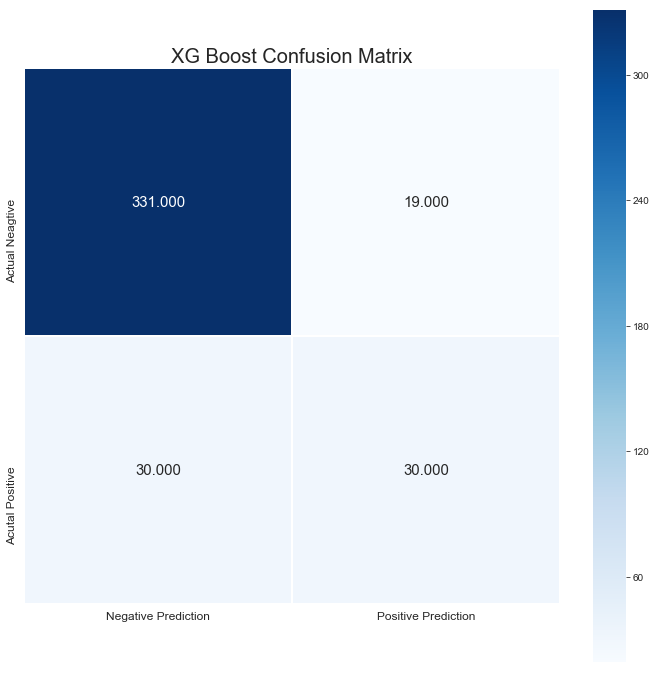

In [428]:
cm_xg = confusion_matrix(y_test, y_pred_test_xgbc)
plt.figure(figsize = (12, 12))
sns.heatmap(cm_xg, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues",annot_kws={"size": 15},
            xticklabels=['Negative Prediction','Positive Prediction'], yticklabels=['Actual Neagtive','Acutal Positive'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('XG Boost Confusion Matrix', size=20)
plt.savefig('XG_Boost_Confusion_Matrix.png')

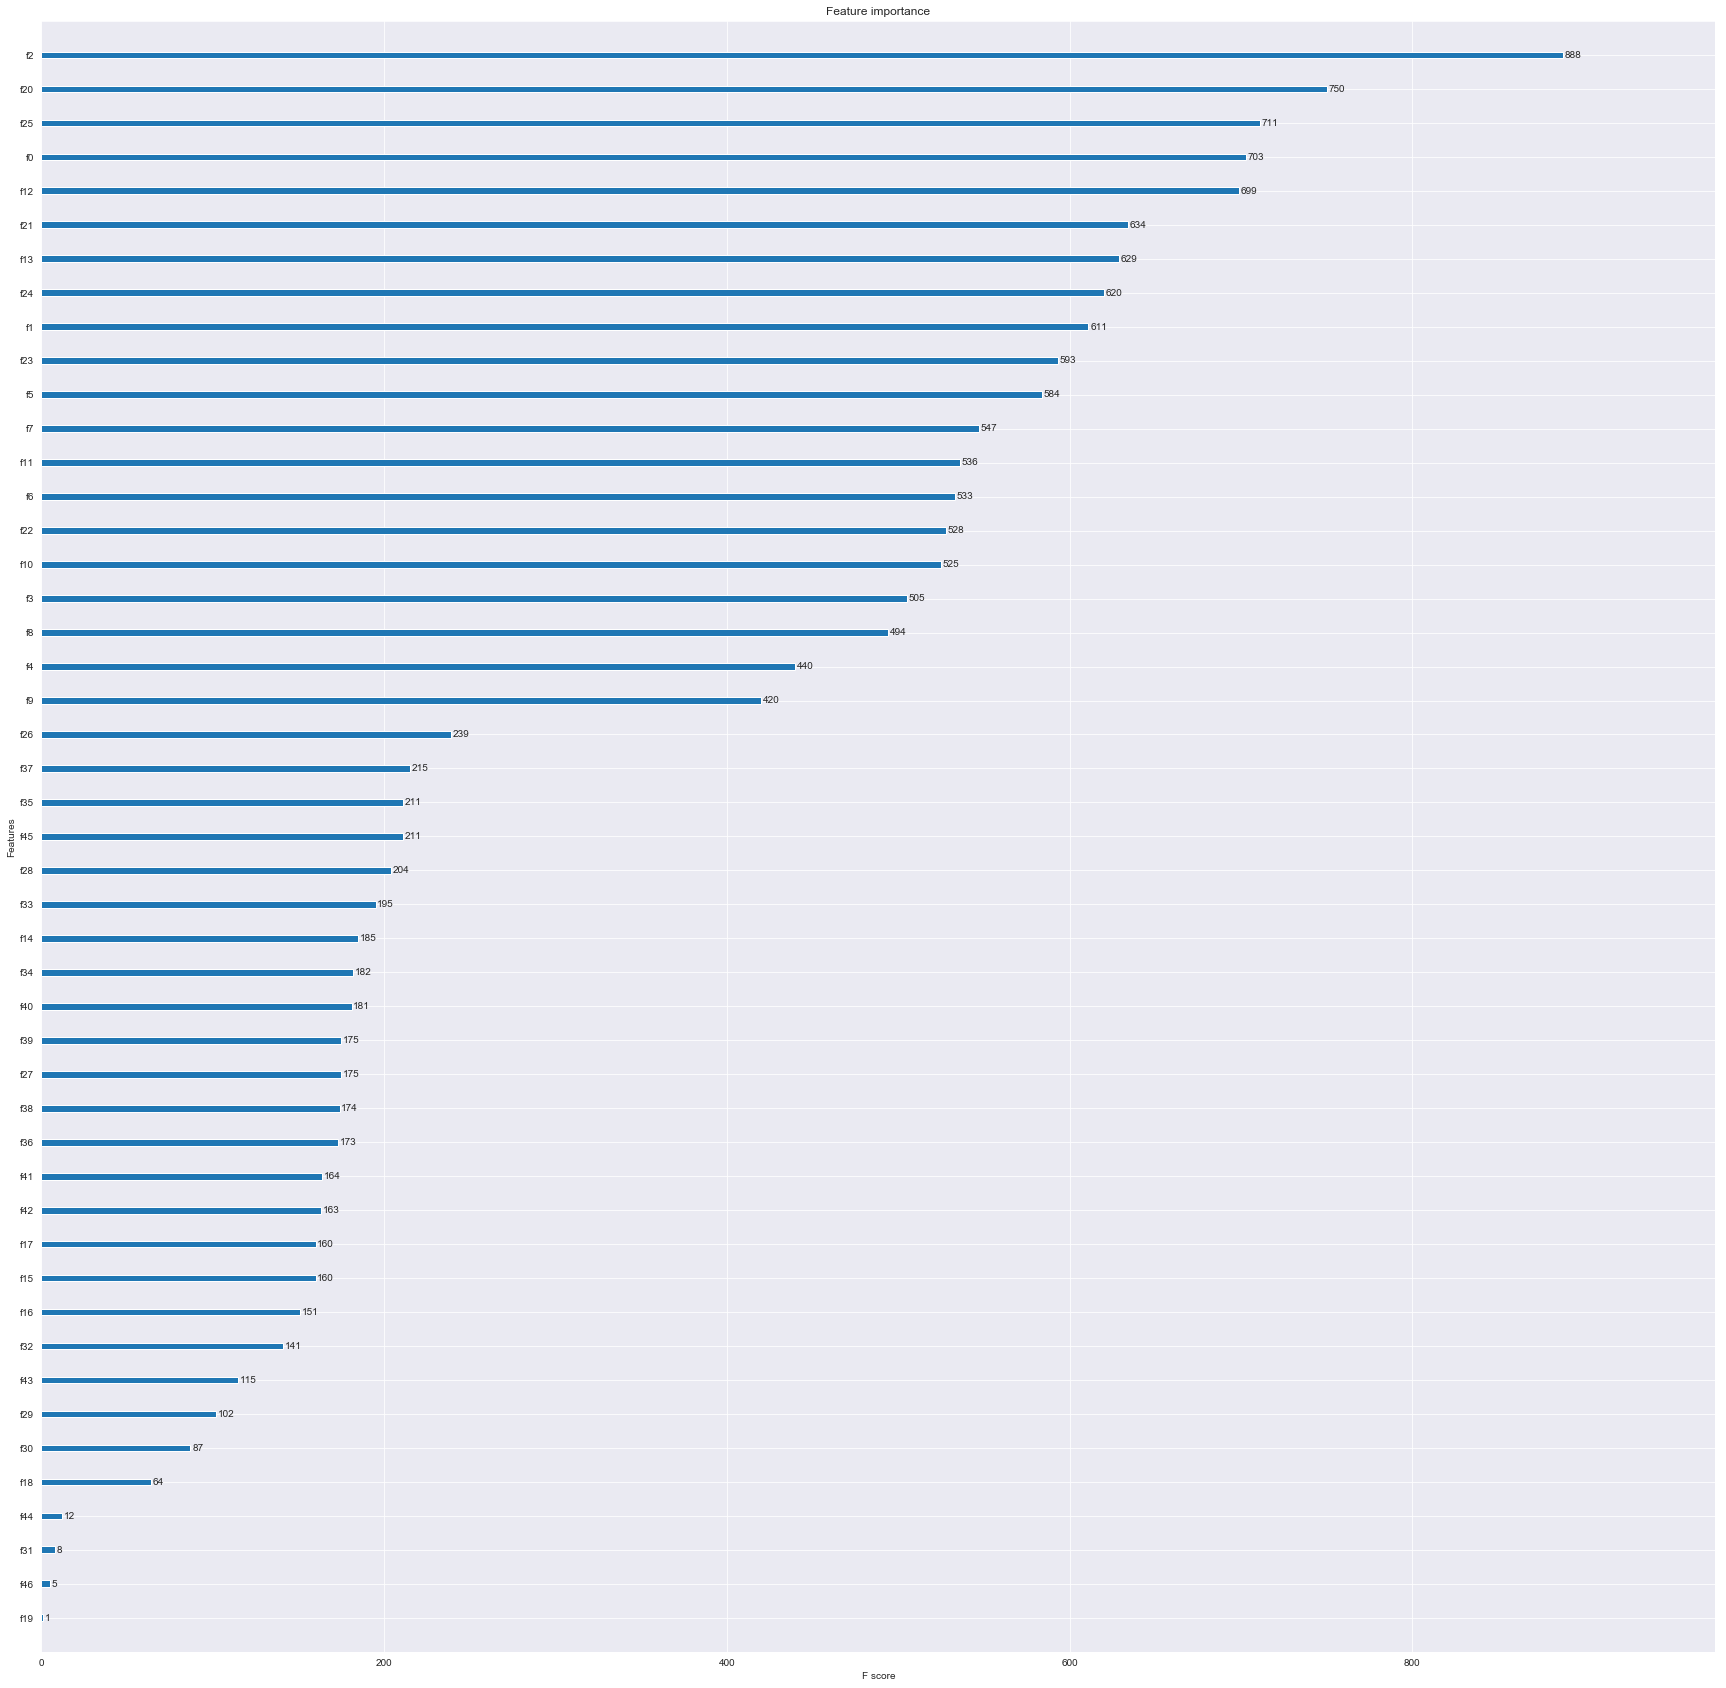

In [371]:
from xgboost import plot_importance
plot_importance(xgbc)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

In [373]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

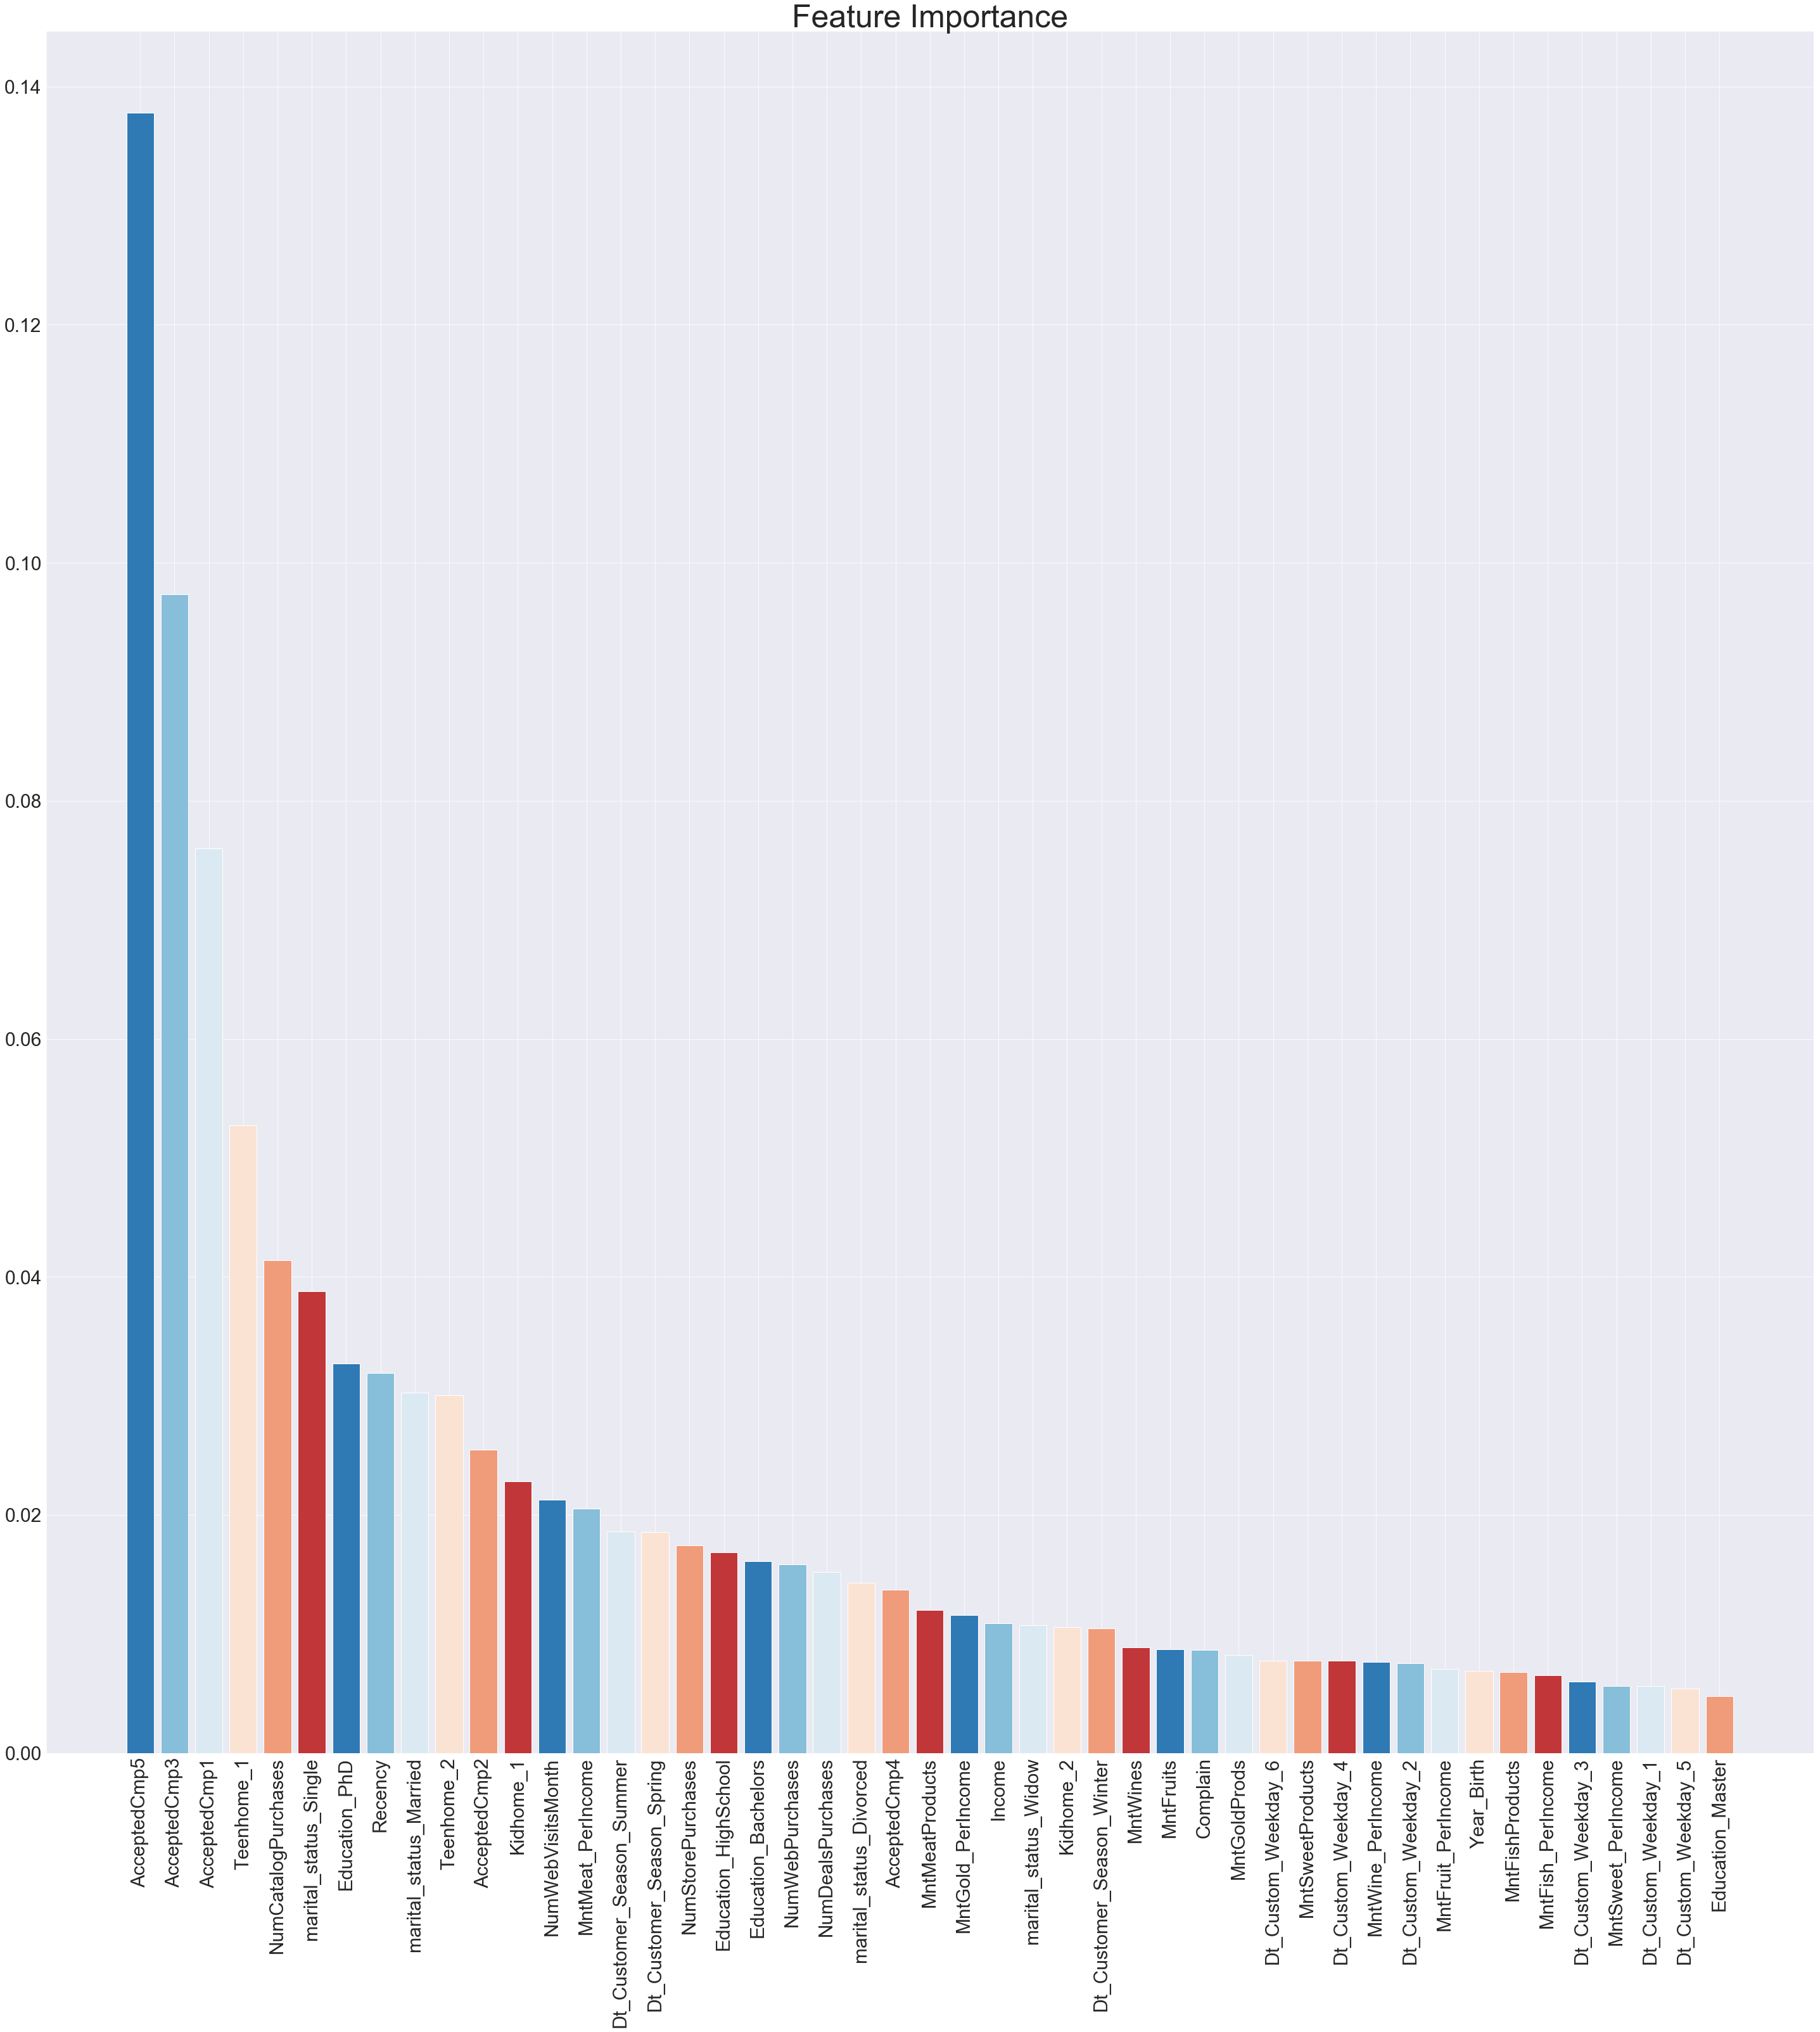

In [426]:
from matplotlib import rc
# Calculate feature importances
importances =xgbc.feature_importances_
 # Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_df.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance", fontsize=50)

# Add bars
plt.bar(range(X_train_df.shape[1]), importances[indices], color = sns.color_palette('RdBu_r'))

# Add feature names as x-axis labels
plt.xticks(range(X_train_df.shape[1]), names, rotation=90, fontsize=30)
plt.yticks(fontsize=30)
# Show plot
plt.savefig('feature_importance.png')
plt.show()
